**UCS2612 Machine Learning Laboratory**


**Assignment 5: K-Nearest Neighbours**


**Name: B Ayshwarya**


**Reg. No.: 3122 21 5001 017**



**Importing necessary libraries and functions**

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,pairwise_distances, roc_curve, auc
from sklearn.model_selection import train_test_split

**Loading the dataset**

In [10]:
from google.colab import drive

drive.mount('/content/drive')  # Mount to /content/drive

Mounted at /content/drive


In [11]:
df=pd.read_csv('/content/online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


**Preprocessing and Exploratory Data Analysis**

In [13]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [12]:
# Number of columns and data type of each
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [14]:
# Checking for missing values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

**Encoding categorical columns in a DataFrame by converting them to numerical labels using label encoding. This is a common preprocessing step before feeding data into machine learning models.**

In [15]:
# Encode categorical columns (type object)

for col in df.select_dtypes(include=['object','bool']).columns:

    print(f"{col}: {df[col].unique()}")
    df[col] = df[col].astype(str)

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    print(f"{col}: {df[col].unique()}")

Month: ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
Month: [2 5 6 8 4 3 0 7 9 1]
VisitorType: ['Returning_Visitor' 'New_Visitor' 'Other']
VisitorType: [2 0 1]
Weekend: [False  True]
Weekend: [0 1]
Revenue: [False  True]
Revenue: [0 1]


In [16]:
# Correlation pairwise-columns to build heat-map
correlation_matrix = df.corr()

A **correlation heatmap** is a graphical tool used to visualize the relationships between multiple variables in a dataset. It's essentially a color-coded matrix where:



**Rows and Columns:** Represent individual variables in data.


**Color Intensity:** Indicates the strength and direction of the correlation between two variables.

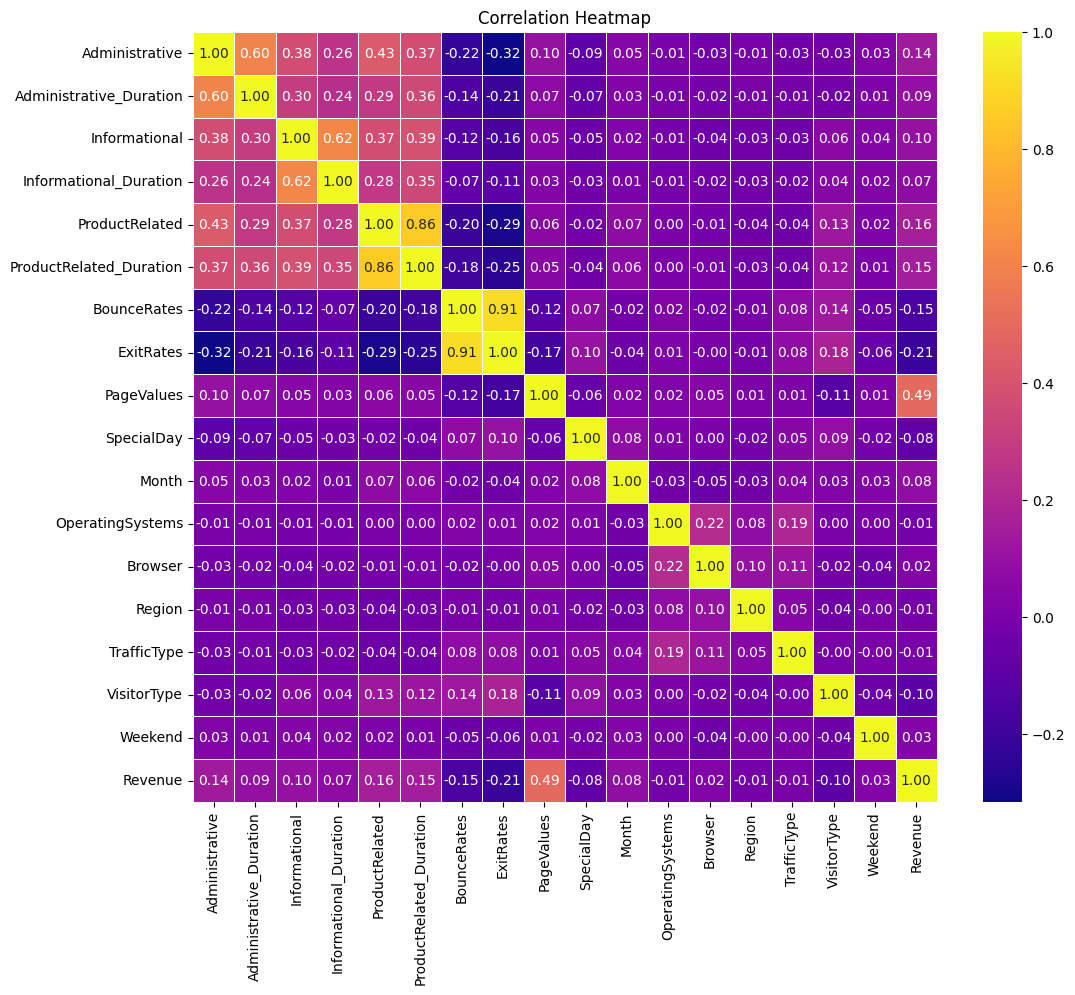

In [31]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()
# PageValues attribute seemingly is more related to Revenue than other attributes

**Train Test Split**



In [18]:
# Features and Target Variable
x=df.drop('Revenue',axis=1)
y=df['Revenue']

In [26]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

**Scikit-Learn KNeighborsClassifier**

In [28]:
# Using different distance metrics (euclidean, manhattan and minkowski), and k=3 and comparing accuracies
def KNN(k, distance):
    # Initialize the KNN classifier
    knn_classifier_sk = KNeighborsClassifier(n_neighbors=k, metric=distance)

    # Train the model
    knn_classifier_sk.fit(x_train, y_train)
    # Predict on the test set
    y_pred = knn_classifier_sk.predict(x_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, knn_classifier_sk

print("Accuracy:")
accuracy,knn_classifier_sk = KNN(3,"euclidean")
print("Using Euclidean Distance: ",accuracy)
print("Using Manhattan Distance: ",KNN(3, "manhattan")[0])
print("Using Mikowski Distance: ",KNN(3, "minkowski")[0])

# With manhattan distance metric, slightly better accuracy is obtained

Accuracy:
Using Euclidean Distance:  0.8483373884833739
Using Manhattan Distance:  0.8499594484995945
Using Mikowski Distance:  0.8483373884833739


In [29]:
# Using different values of k with the euclidean metric
print("k=5: Accuracy: ", KNN(5, "euclidean")[0])
print("k=10: Accuracy: ", KNN(10, "euclidean")[0])
print("k=15: Accuracy: ", KNN(15, "euclidean")[0])
print("k=20: Accuracy: ", KNN(20, "euclidean")[0])

# Accuracy seems to increase as the value of k increases

k=5: Accuracy:  0.8567180319005137
k=10: Accuracy:  0.8583400919167342
k=15: Accuracy:  0.8591511219248446
k=20: Accuracy:  0.8583400919167342


**User Defined KNN Classifier**

In [30]:
# Using distance metric - euclidean and k=3
class KNNClassifier:
    def __init__(self, k=3, distance='euclidean'):
        self.k = k
        self.distance = distance

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        distances = pairwise_distances(X, self.X_train, metric=self.distance)
        y_pred = [self._predict(dist) for dist in distances]
        return np.array(y_pred)

    def _predict(self, distances):
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common
    # for plotting ROC Curves
    def predict_proba(self, X):
        distances = pairwise_distances(X, self.X_train, metric=self.distance)
        y_probs = []
        for dist in distances:
            k_indices = np.argsort(dist)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            class_probs = [k_nearest_labels.count(c) / self.k for c in np.unique(self.y_train)]
            y_probs.append(class_probs)
        return np.array(y_probs)

def KNN_user(k=3, distance="euclidean"):
    knn_classifier = KNNClassifier(k=3)
    knn_classifier.fit(x_train.values, y_train.values)
    y_pred = knn_classifier.predict(x_test.values)
    accuracy = np.mean(y_pred == y_test.values)
    return accuracy, knn_classifier

accuracy, knn_classifier = KNN_user(k=3)
print("Accuracy:", accuracy)

Accuracy: 0.8483373884833739


In [23]:
# Using different values of k with the euclidean metric
print("k=5: Accuracy: ", KNN_user(5, "euclidean")[0])
print("k=10: Accuracy: ", KNN_user(10, "euclidean")[0])
print("k=15: Accuracy: ", KNN_user(15, "euclidean")[0])
print("k=20: Accuracy: ", KNN_user(20, "euclidean")[0])

## Accuracy stays the same

k=5: Accuracy:  0.8398215733982157
k=10: Accuracy:  0.8398215733982157
k=15: Accuracy:  0.8398215733982157
k=20: Accuracy:  0.8398215733982157


**ROC Curves**

An ROC curve (Receiver Operating Characteristic curve) is a visualization tool used to evaluate the performance of binary classification models. It helps us assess how well our model can distinguish between positive and negative classes at various classification thresholds.

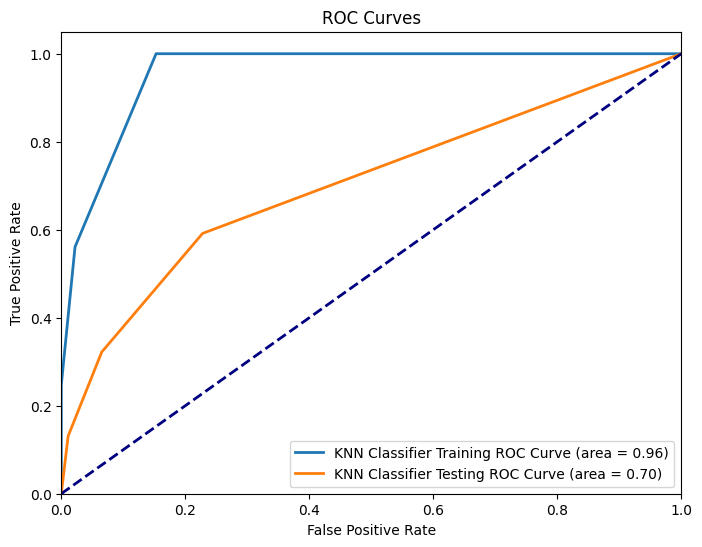

In [24]:
from sklearn.metrics import roc_curve, auc
# Function to plot ROC curve
def plot_roc_curve(y_true, y_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label= title+' (area = %0.2f)' % roc_auc)

# Function to plot ROC curves for training and testing data on the same graph
def plot_roc_curves(classifier, x_train, y_train, x_test, y_test, title):
    classifier.fit(x_train, y_train)
    y_train_prob = classifier.predict_proba(x_train)[:, 1]
    y_test_prob = classifier.predict_proba(x_test)[:, 1]

    plt.figure(figsize=(8, 6))
    plot_roc_curve(y_train, y_train_prob, f'{title} Training ROC Curve')
    plot_roc_curve(y_test, y_test_prob, f'{title} Testing ROC Curve')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc="lower right")
    plt.show()
# Plotting ROC Curves for sklearn KNeighborsClassifier Model
plot_roc_curves(knn_classifier_sk, x_train.values, y_train.values, x_test.values, y_test.values, 'KNN Classifier')

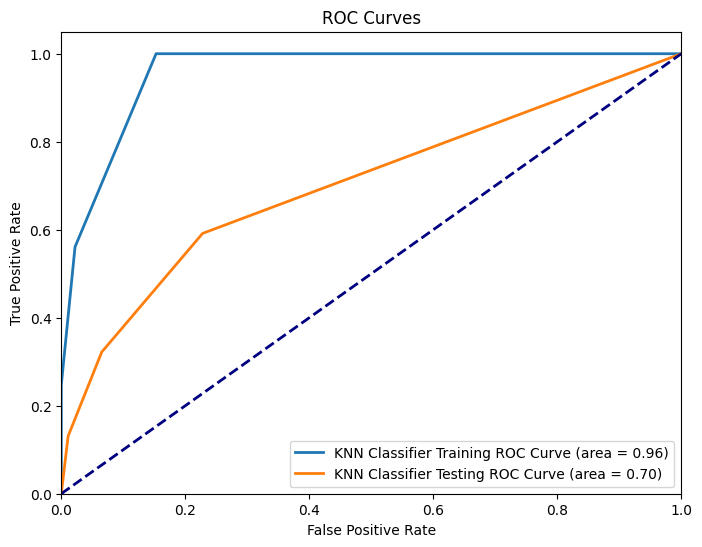

In [25]:
# Plotting ROC Curves for User-defined KNNClassifier
plot_roc_curves(knn_classifier, x_train.values, y_train.values, x_test.values, y_test.values, 'KNN Classifier')

**Inference**

For the dataset chosen, the accuracy score seems to increase with the value of k, with respect to scikit-learn's KNeighbors Classifier Model.

Scikit-learn's KNeighborsClassifier is highly optimized and includes additional features like efficient data structures (e.g., KD-trees, Ball-trees) to speed up nearest neighbor searches.

**Learning Outcomes**


Implementing the KNN model from scratch for better understanding.

Evaluating KNN model's performance using various metrics and visualization og ROC Curve.

Comparing scikit-learn and user defined KNN models, and understanding that the library model is highly optimized with the use of appropriate data structures

Learning how the model's performance is impacted by using different parameters (k and distance metric)
